In [1]:
import os
import sys


current_dir = os.getcwd()
repo_root = current_dir

while "scripts" not in os.listdir(repo_root):
    parent = os.path.abspath(os.path.join(repo_root, ".."))
    if parent == repo_root:  # reached filesystem root
        raise FileNotFoundError("Cannot find 'scripts' folder in parent directories")
    repo_root = parent

# Add repo root to Python path
if repo_root not in sys.path:
    sys.path.append(repo_root)

print("!Added repo root to sys.path:", repo_root)

import scripts
import scripts.functionConfig as funcConfig
import scripts.accquistions as acq
import scripts.setBoundary as bound
import scripts.setup.gpBuilder as build
import scripts.BBOloop as bbo_loop
from scripts.BBOloop import *
from scripts import *

import scripts
import scripts.accquistions as acq
import scripts.setBoundary as bound
import scripts.setup.gpBuilder as build
import scripts.BBOloop as bbo_loop  
from scripts.utils.generateX_Y import *
from scripts.BBOloop import *
import scripts.functionConfig as funcConfig
from collections import defaultdict

!Added repo root to sys.path: /workspaces/MLProject_CapstoneBlackBoxOptimisation


In [3]:
import numpy as np
X, y = generate_data(1,7)
# Assuming 2D inputs for simplicity
x1 = np.linspace(0, 1, 100)
x2 = np.linspace(0, 1, 100)
xx1, xx2 = np.meshgrid(x1, x2)
grid_points = np.column_stack([xx1.ravel(), xx2.ravel()])


Initial count: 10
Weekly count: 7
Combined: 17
17


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel, WhiteKernel

# Suppose you have:
# your_candidates = list of input points, each is an array([x, y])
# your_values = list of corresponding objective values

# X = np.array(your_candidates)  # shape (n_samples, 2)
# y = np.array(your_values)      # shape (n_samples, )

# Define a kernel: RBF + WhiteKernel (for noise)
kernel = ConstantKernel(1.0) * RBF(length_scale=[1.0, 1.0]) + WhiteKernel(noise_level=1e-6)

# Create GP regressor
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, normalize_y=True)

# Fit GP to your data
gp.fit(X, y)

print("Fitted kernel:", gp.kernel_)

Fitted kernel: 1.05**2 * RBF(length_scale=[1.71e+04, 0.0269]) + WhiteKernel(noise_level=1e-05)


/home/codespace/.local/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:440: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


In [5]:
# gp is your trained Gaussian Process for this function
mu, sigma = gp.predict(grid_points, return_std=True)

# reshape back to grid
mu_grid = mu.reshape(xx1.shape)
sigma_grid = sigma.reshape(xx1.shape)


In [6]:
from scipy.ndimage import maximum_filter

# Find local maxima
neighborhood_size = 5  # tune this
local_max = (mu_grid == maximum_filter(mu_grid, size=neighborhood_size))

# optionally filter by high mean value
threshold = 0.8 * mu.max()  # keep only peaks above 80% of max
peaks = local_max & (mu_grid >= threshold)

# get coordinates of peaks
peak_coords = np.column_stack(np.nonzero(peaks))
peak_points = np.column_stack([xx1[peaks], xx2[peaks]])
print("High-output points:", peak_points)

High-output points: [[0.         0.78787879]]


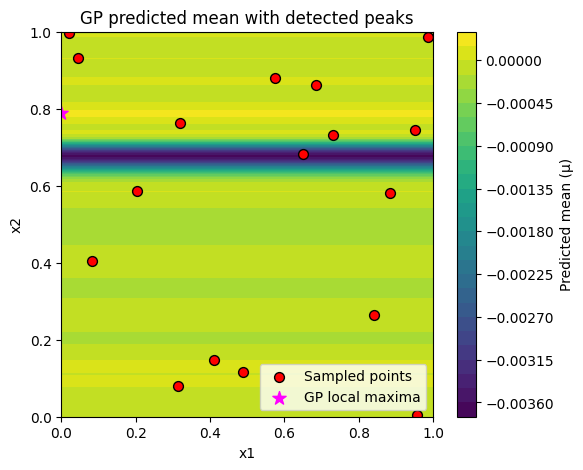

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
plt.contourf(xx1, xx2, mu_grid, levels=30, cmap="viridis")
plt.colorbar(label="Predicted mean (μ)")
plt.scatter(X[:,0], X[:,1], c='red', edgecolor='black', s=50, label='Sampled points')
plt.scatter(peak_points[:,0], peak_points[:,1], c='magenta', s=100, marker='*', label='GP local maxima')
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("GP predicted mean with detected peaks")
plt.show()


Initial count: 10
Weekly count: 7
Combined: 17
17


Fitted kernel: 0.922**2 * RBF(length_scale=[0.0545, 5.76]) + WhiteKernel(noise_level=0.0217)
Detected 1 high-output points:
[[0.68844221 1.        ]]


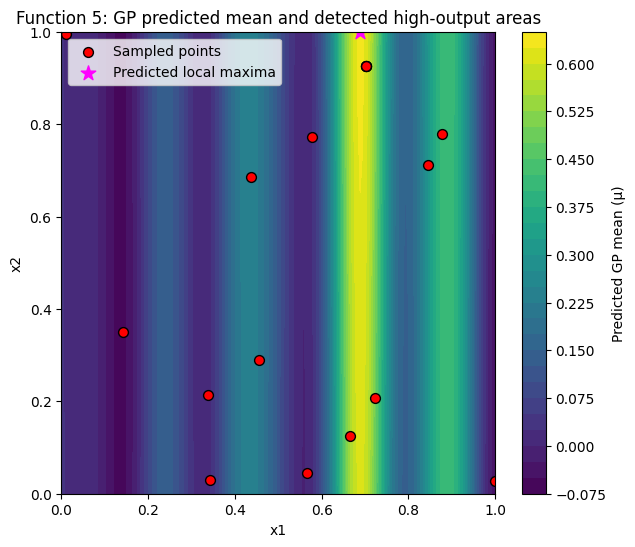

In [ ]:
# ## Function 5: Visualizing Multiple High-Output Areas
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import maximum_filter

X, y = generate_data(2,7)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel, WhiteKernel


# Define a kernel: RBF + WhiteKernel (for noise)
kernel = ConstantKernel(1.0) * RBF(length_scale=[1.0, 1.0]) + WhiteKernel(noise_level=1e-6)

# Create GP regressor
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, normalize_y=True)

# Fit GP to your data
gp.fit(X, y)

print("Fitted kernel:", gp.kernel_)
# -------------------------------
# Step 1: Create a grid over the input space
# -------------------------------
# Assuming 2D inputs for visualization
x1 = np.linspace(0, 1, 200)  # adjust resolution as needed
x2 = np.linspace(0, 1, 200)
xx1, xx2 = np.meshgrid(x1, x2)
grid_points = np.column_stack([xx1.ravel(), xx2.ravel()])

# -------------------------------
# Step 2: Predict GP mean and standard deviation over the grid
# -------------------------------
mu, sigma = gp.predict(grid_points, return_std=True)
mu_grid = mu.reshape(xx1.shape)
sigma_grid = sigma.reshape(xx1.shape)

# -------------------------------
# Step 3: Detect local maxima (high-output areas)
# -------------------------------
# Use a maximum filter to find local peaks
neighborhood_size = 5  # adjust for sensitivity
local_max = (mu_grid == maximum_filter(mu_grid, size=neighborhood_size))

# Optional: keep only the high peaks (e.g., top 80% of GP mean)
threshold = 0.8 * mu.max()
peaks = local_max & (mu_grid >= threshold)

# Extract coordinates of peak points
peak_points = np.column_stack([xx1[peaks], xx2[peaks]])
print(f"Detected {len(peak_points)} high-output points:")
print(peak_points)

# -------------------------------
# Step 4: Plot GP mean and highlight peaks
# -------------------------------
plt.figure(figsize=(7,6))

# GP mean as contour
plt.contourf(xx1, xx2, mu_grid, levels=30, cmap="viridis")
plt.colorbar(label="Predicted GP mean (μ)")

# Sampled points in red
plt.scatter(X[:,0], X[:,1], c='red', edgecolor='black', s=50, label='Sampled points')

# Local maxima in yellow stars
plt.scatter(peak_points[:,0], peak_points[:,1], c='magenta', s=120, marker='*', label='Predicted local maxima')

# Labels and legend
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Function 5: GP predicted mean and detected high-output areas")
plt.legend()
plt.show()

Detected 1 high-output points
Detected 0 clusters of high-output areas


NameError: name 'X_train' is not defined

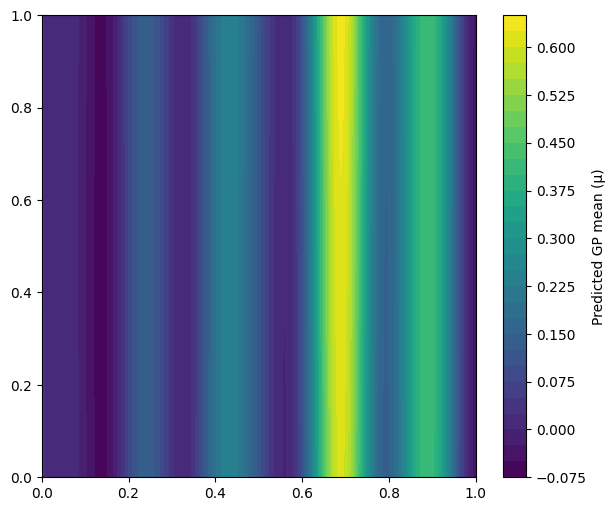

In [12]:
# ## Function 5: Visualizing and clustering multiple high-output areas
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import maximum_filter
from sklearn.cluster import DBSCAN

# -------------------------------
# Step 1: Create a grid over the input space
# -------------------------------
x1 = np.linspace(0, 1, 200)
x2 = np.linspace(0, 1, 200)
xx1, xx2 = np.meshgrid(x1, x2)
grid_points = np.column_stack([xx1.ravel(), xx2.ravel()])

# -------------------------------
# Step 2: Predict GP mean and standard deviation
# -------------------------------
mu, sigma = gp.predict(grid_points, return_std=True)
mu_grid = mu.reshape(xx1.shape)
sigma_grid = sigma.reshape(xx1.shape)

# -------------------------------
# Step 3: Detect local maxima
# -------------------------------
neighborhood_size = 5
local_max = (mu_grid == maximum_filter(mu_grid, size=neighborhood_size))
threshold = 0.8 * mu.max()
peaks = local_max & (mu_grid >= threshold)
peak_points = np.column_stack([xx1[peaks], xx2[peaks]])
print(f"Detected {len(peak_points)} high-output points")

# -------------------------------
# Step 4: Cluster peaks using DBSCAN
# -------------------------------
if len(peak_points) > 0:
    clustering = DBSCAN(eps=0.05, min_samples=2).fit(peak_points)
    labels = clustering.labels_  # -1 = noise
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    print(f"Detected {n_clusters} clusters of high-output areas")
else:
    labels = np.array([])

# -------------------------------
# Step 5: Plot GP mean, sampled points, and clusters
# -------------------------------
plt.figure(figsize=(7,6))
plt.contourf(xx1, xx2, mu_grid, levels=30, cmap="viridis")
plt.colorbar(label="Predicted GP mean (μ)")

# Sampled points
plt.scatter(X_train[:,0], X_train[:,1], c='red', edgecolor='black', s=50, label='Sampled points')

# Plot each cluster in a different color
if len(peak_points) > 0:
    for cluster_id in set(labels):
        if cluster_id == -1:
            # noise
            cluster_pts = peak_points[labels==-1]
            plt.scatter(cluster_pts[:,0], cluster_pts[:,1], c='grey', s=80, marker='x', label='Noise peaks')
        else:
            cluster_pts = peak_points[labels==cluster_id]
            plt.scatter(cluster_pts[:,0], cluster_pts[:,1], s=120, marker='*', label=f'High-output area {cluster_id+1}')

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Function 5: GP predicted mean with high-output clusters")
plt.legend()
plt.show()


/home/codespace/.local/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:663: ConvergenceWarning: lbfgs failed to converge after 3 iteration(s) (status=2):
ABNORMAL: 

You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


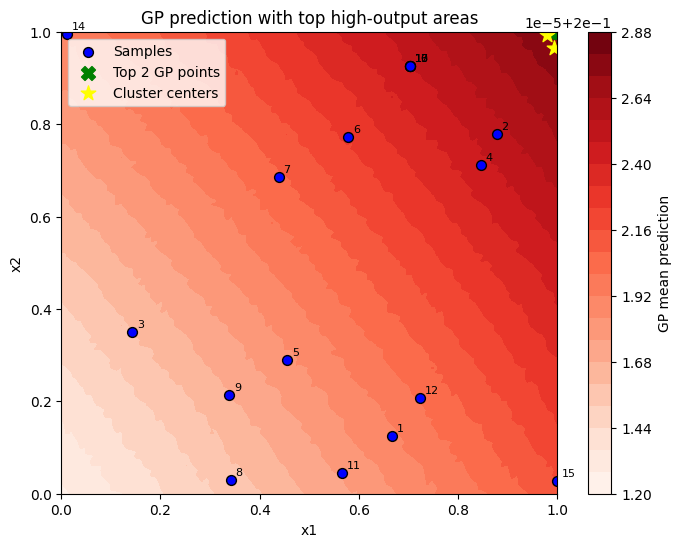

In [ ]:
# -------------------------------
# 2D Slice Visualization & Local Maxima Detection
# -------------------------------
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern
from sklearn.cluster import KMeans

# -------------------------------

# -------------------------------
# Fit a GP
# -------------------------------
kernel = RBF(length_scale=1.0) + Matern(length_scale=1.0, nu=1.5)
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=5, normalize_y=True)
gp.fit(X, y)

# -------------------------------
# Create a 2D grid slice (pick first 2 dimensions)
# -------------------------------
grid_size = 100
x1 = np.linspace(0, 1, grid_size)
x2 = np.linspace(0, 1, grid_size)
xx1, xx2 = np.meshgrid(x1, x2)

# Fill remaining dimensions with mean values
mean_rest = np.mean(X[:, 2:], axis=0)
grid_points = np.column_stack([xx1.ravel(), xx2.ravel()])
grid_points_full = np.hstack([grid_points, np.tile(mean_rest, (grid_points.shape[0], 1))])

# Predict GP mean
mu, sigma = gp.predict(grid_points_full, return_std=True)
mu_grid = mu.reshape(xx1.shape)

# -------------------------------
# Detect top 2 local maxima
# -------------------------------
# Flatten the grid and pick top points
top_indices = np.argsort(mu)[-2:]  # top 2
top_points = grid_points[top_indices]

# Optional: cluster high-value areas (if many candidates)
kmeans = KMeans(n_clusters=2, random_state=42).fit(grid_points[np.argsort(mu)[-20:]])
cluster_centers = kmeans.cluster_centers_

# -------------------------------
# Plot
# -------------------------------
plt.figure(figsize=(8,6))
plt.contourf(xx1, xx2, mu_grid, levels=20, cmap='Reds')
plt.colorbar(label="GP mean prediction")

# Plot original sample points
plt.scatter(X[:,0], X[:,1], c='blue', edgecolor='black', s=50, label='Samples')

# Annotate points with index
for i, (x_i, y_i) in enumerate(X[:, :2]):
    plt.text(x_i+0.01, y_i+0.01, str(i+1), fontsize=8)

# Mark top 2 points from GP
plt.scatter(top_points[:,0], top_points[:,1], c='green', s=100, marker='X', label='Top 2 GP points')

# Mark cluster centers
plt.scatter(cluster_centers[:,0], cluster_centers[:,1], c='yellow', s=120, marker='*', label='Cluster centers')

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("GP prediction with top high-output areas")
plt.legend()
plt.show()


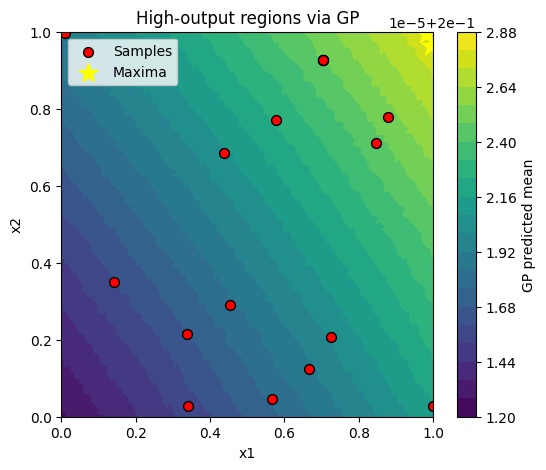

TypeError: Input z must be 2D, not 1D

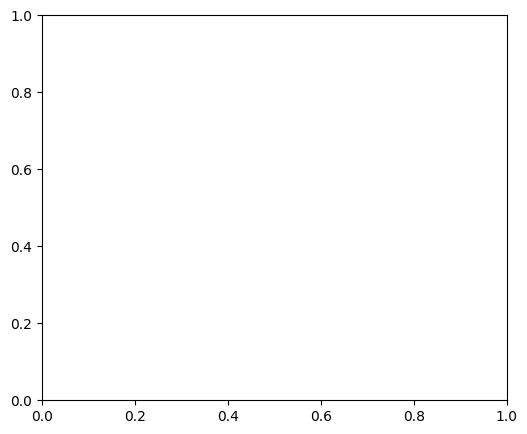

In [ ]:
# -----------------------------------------------
# Bayesian Optimization: Identify 2 separate high-output regions per function
# -----------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Suppose we have these from GP prediction for a function:
# xx1, xx2 = meshgrid coordinates
# mu = predicted mean output at each grid point
# X_samples, y_samples = the actual input/output samples
grid_size = 100
x1 = np.linspace(0, 1, grid_size)
x2 = np.linspace(0, 1, grid_size)
xx1, xx2 = np.meshgrid(x1, x2)
# Example: reshape your grid into a 2D array of points
grid_points = np.column_stack([xx1.ravel(), xx2.ravel()])
mu_flat = mu.ravel()
# Make sure mu is 2D for contourf
mu_grid = mu.reshape(xx1.shape)  # reshape 1D GP predictions to match meshgrid

plt.figure(figsize=(6,5))
plt.contourf(xx1, xx2, mu_grid, levels=20, cmap="viridis")
plt.colorbar(label="GP predicted mean")
plt.scatter(X[:,0], X[:,1], c='red', edgecolor='black', s=50, label='Samples')
plt.scatter(cluster_centers[:,0], cluster_centers[:,1], c='yellow', s=200, marker='*', label='Maxima')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("High-output regions via GP")
plt.legend()
plt.show()


# Step 1: Select top 10% high-value points
top_percent = 0.10
num_top = max(2, int(len(mu_flat) * top_percent))
top_idx = np.argsort(mu_flat)[-num_top:]  # indices of top values
top_points = grid_points[top_idx]

# Step 2: Cluster top points to find 2 separate maxima regions
kmeans = KMeans(n_clusters=2, random_state=42).fit(top_points)
cluster_centers = kmeans.cluster_centers_

# Step 3: Plot the GP mean and overlay sampled points + two stars
plt.figure(figsize=(6,5))
plt.contourf(xx1, xx2, mu, levels=20, cmap="viridis")
plt.colorbar(label="GP predicted mean")

# Plot original sampled points
plt.scatter(X[:,0], X[:,1], c='red', edgecolor='black', s=50, label='Samples')

# Plot the two cluster centers as stars
plt.scatter(cluster_centers[:,0], cluster_centers[:,1], c='yellow', s=200, marker='*', label='Maxima')

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Function: High-output regions via GP")
plt.legend()
plt.show()


# -----------------------------------------------


In [16]:
# ===============================================
# Plotting Global and Local Maxima with GP
# ===============================================

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

# -------------------------------
# Step 0: Example GP prediction
# -------------------------------

# X_train: sampled points (Nx2), y_train: observed outputs (N,)
# Example:
# X_train = np.array([...])
# y_train = np.array([...])

# Fit a simple GP (for demonstration)
kernel = RBF(length_scale=0.2)
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=5, normalize_y=True)
gp.fit(X, y)
fixed_dims = [X[:,2].mean(), X[:,3].mean()]
# -------------------------------
# Step 1: Create a grid over the input space
# -------------------------------
x1 = np.linspace(0, 1, 100)
x2 = np.linspace(0, 1, 100)
xx1, xx2 = np.meshgrid(x1, x2)
# X_grid = np.c_[xx1.ravel(), xx2.ravel()]
X_grid = np.c_[xx1.ravel(), xx2.ravel(),
               np.full(xx1.ravel().shape, fixed_dims[0]),
               np.full(xx2.ravel().shape, fixed_dims[1])]
# Predict GP mean over the grid
mu, sigma = gp.predict(X_grid, return_std=True)
mu_grid = mu.reshape(xx1.shape)

# -------------------------------
# Step 2: Identify global and local maxima
# -------------------------------

# Global maximum
global_idx = np.argmax(mu)
global_max = X_grid[global_idx]

# Local maxima: cluster top predicted points
top_fraction = 0.05  # top 5% points
n_top = max(2, int(top_fraction * len(mu)))  # at least 2 points
top_idx = np.argsort(mu)[-n_top:]
top_points = X_grid[top_idx]

# Cluster top points into 2 clusters (example for 2 local regions)
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(top_points)
local_maxima = kmeans.cluster_centers_

# -------------------------------
# Step 3: Plot GP mean, sampled points, and maxima
# -------------------------------
plt.figure(figsize=(7,6))

# GP mean as contour
plt.contourf(xx1, xx2, mu_grid, levels=20, cmap="viridis")
plt.colorbar(label="GP predicted mean")

# Plot original sampled points
plt.scatter(X[:,0], X[:,1], c='white', edgecolor='black', s=50, label="Samples")

# Plot global maximum
plt.scatter(global_max[0], global_max[1], c='red', s=150, marker='*', label="Global max")

# Plot local maxima (cluster centers)
plt.scatter(local_maxima[:,0], local_maxima[:,1], c='yellow', s=120, marker='*', label="Local maxima")

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("GP Predicted Surface with Global and Local Maxima")
plt.legend()
plt.show()


IndexError: index 2 is out of bounds for axis 1 with size 2

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import maximum_filter, gaussian_filter


X, y = generate_data(5,7)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel, WhiteKernel, Matern



kernel = Matern + WhiteKernel(noise_level=1e-6)

# Create GP regressor
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, normalize_y=True)

# Fit GP to your data
gp.fit(X, y)
# -------------------------------
# Step 1: Create grid over input space
# -------------------------------
fixed_dims = [X[:,2].mean(), X[:,3].mean()]
x1_min, x1_max = 0, 1
x2_min, x2_max = 0, 1
grid_points = 100  # resolution
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, grid_points),
                       np.linspace(x2_min, x2_max, grid_points))
X_grid = np.c_[xx1.ravel(), xx2.ravel(),
               np.full(xx1.ravel().shape, fixed_dims[0]),
               np.full(xx2.ravel().shape, fixed_dims[1])]

# -------------------------------
# Step 2: Predict GP mean on grid
# -------------------------------
mu, sigma = gp.predict(X_grid, return_std=True)
mu_grid = mu.reshape(xx1.shape)

# -------------------------------
# Step 3: Identify local maxima
# -------------------------------
# Smooth to avoid tiny numerical bumps
mu_smooth = gaussian_filter(mu_grid, sigma=1.0)
# Find local maxima
neighborhood = 3  # grid cells
local_max = (mu_smooth == maximum_filter(mu_smooth, size=neighborhood))
max_coords = np.argwhere(local_max)

# Convert grid indices to input space
max_points = np.array([ [xx1[i,j], xx2[i,j]] for i,j in max_coords ])
max_values = np.array([ mu_grid[i,j] for i,j in max_coords ])

# -------------------------------
# Step 4: Plot GP predictions and maxima
# -------------------------------
plt.figure(figsize=(6,5))
plt.contourf(xx1, xx2, mu_grid, levels=20, cmap="viridis")
plt.colorbar(label="GP predicted mean")
plt.scatter(X[:,0], X[:,1], c='red', edgecolor='black', s=50, label="Sampled points")
plt.scatter(max_points[:,0], max_points[:,1], c='magenta', s=80, marker='*', label="Local maxima")

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("BO focus regions for this function")
plt.legend()
plt.show()


Initial count: 20
Weekly count: 7
Combined: 27
27


TypeError: loop of ufunc does not support argument 0 of type ABCMeta which has no callable log method